In [3]:
!ls -lh ../data/*.csv

-rw-rw-r-- 1 ivan ivan  21M Dec  2 19:40 ../data/clients.csv
-rw-rw-r-- 1 ivan ivan 3.8M Dec  2 19:40 ../data/products.csv
-rw-rw-r-- 1 ivan ivan 4.2G Dec  2 19:49 ../data/purchases.csv
-rw-rw-r-- 1 ivan ivan 5.8M Dec  2 19:40 ../data/uplift_sample_submission.csv
-rw-rw-r-- 1 ivan ivan 2.1M Dec  2 19:40 ../data/uplift_test.csv
-rw-rw-r-- 1 ivan ivan 2.9M Dec  2 19:40 ../data/uplift_train.csv


In [7]:
!head -n 4 ../data/uplift_sample_submission.csv

client_id,uplift
008fb49e3a,0.1149912020897228
0095340acc,0.8353208872466903
015c0b4d79,0.3085840952650095


In [154]:
import numpy as np
import pandas as pd

In [16]:
import matplotlib.pyplot as plt

## Read

In [5]:
df_clients = pd.read_csv('../data/clients.csv')
df_products = pd.read_csv('../data/products.csv')
df_purchases = pd.read_csv('../data/purchases.csv')

In [8]:
df_train = pd.read_csv('../data/uplift_train.csv')

## Transformations

In [85]:
df_purchases['transaction_datetime'] = pd.to_datetime(df_purchases['transaction_datetime'])

In [96]:
df_purchases['transaction_month'] = \
    df_purchases['transaction_datetime'].dt.floor('D') - \
    pd.to_timedelta(df_purchases['transaction_datetime'].dt.day - 1, 'D')

## Train target

In [14]:
df_train.assign(cnt=1).pivot_table(index='treatment_flg', columns='target', aggfunc='sum')

cnt       
target             0      1
treatment_flg              
0              39695  60363
1              36342  63639

## Clients

In [15]:
df_clients.head()

,client_id,first_issue_date,first_redeem_date,age,gender
0,000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45,U
1,000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72,F
2,000048b7a6,2018-12-15 13:33:11,NaN,68,F
3,000073194a,2017-05-23 12:56:14,2017-11-24 11:18:01,60,F
4,00007c7133,2017-05-22 16:17:08,2018-12-31 17:17:33,67,U


In [53]:
df_clients['client_id'].nunique()

400162

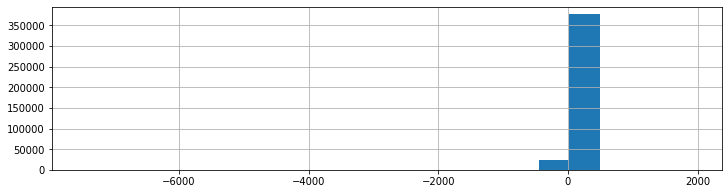

In [20]:
df_clients['age'].hist(bins=20, figsize=(12, 3))

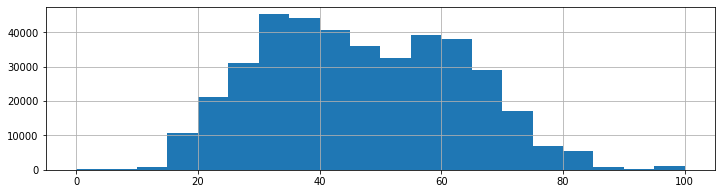

In [166]:
df_clients['age'].clip(0, 100).hist(bins=20, figsize=(12, 3))

In [167]:
df_clients['age'].quantile([0.25, 0.50, 0.75])

0.25    34.0
0.50    45.0
0.75    59.0
Name: age, dtype: float64

In [21]:
df_clients['gender'].value_counts()

U    185706
F    147649
M     66807
Name: gender, dtype: int64

In [190]:
df_clients['age_bin'] = np.where(
    (df_clients['age'] < 10) | (df_clients['age'] > 90), -1, np.where(
        df_clients['age'] < 35, 0, np.where(
            df_clients['age'] < 45, 1, np.where(
                df_clients['age'] < 60, 2, 3))))

In [191]:
df_clients['age_bin'].value_counts().sort_index()

-1      1494
 0    108564
 1     85019
 2    107763
 3     97322
Name: age_bin, dtype: int64

In [192]:
df_clients.groupby(['age_bin', 'gender'])['client_id'].count().unstack()

gender,F,M,U
age_bin,,,
-1,73,454,967
0,37681,25143,45740
1,28498,14720,41801
2,38966,15256,53541
3,42431,11234,43657


## Products

In [26]:
df_products

,product_id,level_1,level_2,level_3,level_4,segment_id,brand_id,vendor_id,netto,is_own_trademark,is_alcohol
0,0003020d3c,c3d3a8e8c6,c2a3ea8d5e,b7cda0ec0c,6376f2a852,123.0,394a54a7c1,9eaff48661,0.400,0,0
1,0003870676,e344ab2e71,52f13dac0c,d3cfe81323,6dc544533f,105.0,acd3dd483f,10486c3cf0,0.680,0,0
2,0003ceaf69,c3d3a8e8c6,f2333c90fb,419bc5b424,f6148afbc0,271.0,f597581079,764e660dda,0.500,0,0
3,000701e093,ec62ce61e3,4202626fcb,88a515c084,48cf3d488f,172.0,54a90fe769,03c2d70bad,0.112,0,0
4,0007149564,e344ab2e71,52f13dac0c,d3cfe81323,6dc544533f,105.0,63417fe1f3,f329130198,0.600,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43033,fffac3a287,e344ab2e71,52f13dac0c,0f84eb7480,420c3b3f0b,150.0,5aef526287,f546d8aa6f,0.085,0,0
43034,fffd2946cf,e344ab2e71,52f13dac0c,a1786084ca,b2960bceb8,176.0,7bf16d4aa4,3d8c5ef5f4,0.130,0,0
43035,fffd7fb409,e344ab2e71,1d2939ba1d,2721c4b3d6,32f03574dd,255.0,1267326e16,0cfa052441,0.450,0,0
43036,fffd963a2c,c3d3a8e8c6,c2a3ea8d5e,a6b0dd76e0,a7e8f1cc02,220.0,c2eec3be6f,75ea3d1182,0.300,0,0


In [195]:
df_products.count()

product_id          43038
level_1             43035
level_2             43035
level_3             43035
level_4             43035
segment_id          41466
brand_id            37838
vendor_id           43004
netto               43035
is_own_trademark    43038
is_alcohol          43038
dtype: int64

In [70]:
df_products['level_1'].value_counts()

e344ab2e71    22183
c3d3a8e8c6    16573
ec62ce61e3     4279
Name: level_1, dtype: int64

In [76]:
df_products['level_2'].value_counts()

52f13dac0c    8891
ad2b2e17d2    6631
f2333c90fb    3310
ed2ad1797c    3257
703f4b6eb0    2396
749c619457    2393
14d373dff5    2377
c2a3ea8d5e    2209
1d2939ba1d    1717
f93982269d    1343
4202626fcb    1124
de6f3b925a     910
be86806c6b     757
6b4ae3f25d     570
a49a930a49     540
d283080a93     523
70ac384d6a     502
825fe699ab     441
034aca0659     383
f980df59e1     331
36bd2cad67     285
63852cb2ab     261
428e08386e     245
91fb12a54a     242
fb3d79909e     225
6f624f4be0     206
e8705574ff     174
b0c4967fce     125
93073a7304     114
79666b6e44     100
8a277809e5      87
3f9010c11e      74
fb84f08028      69
c6e84cdac8      56
26ae5a7da8      39
c3d6b407d9      36
a75f1bad01      18
35642addd4      17
3ef03403a0      17
a2963967ff      16
2ede06c1ee      14
15e7af62dd      10
Name: level_2, dtype: int64

In [75]:
df_products['level_3'].value_counts()

ca69ed9de2    3737
419bc5b424    2729
0f84eb7480    2571
38816369ce    2324
6b55683dad    1862
              ... 
c0a411f3b8       1
d26b025821       1
57f95167c1       1
cf7a66aa8b       1
475f86c453       1
Name: level_3, Length: 201, dtype: int64

In [77]:
df_products['level_4'].value_counts()

420c3b3f0b    2500
4d4b7e1f16    2077
3a074a6620    1485
6dc544533f    1313
b4b0e4c470     784
              ... 
9d5c6c6b11       1
690cbc6ce7       1
0c61588ac2       1
53755496eb       1
fca87d4254       1
Name: level_4, Length: 790, dtype: int64

In [78]:
df_products['segment_id'].value_counts()

105.0    5360
150.0    2745
271.0    1690
259.0    1523
85.0     1291
         ... 
23.0       10
211.0       7
171.0       6
258.0       3
144.0       3
Name: segment_id, Length: 116, dtype: int64

In [79]:
df_products['brand_id'].value_counts()

0d6f137fb6    4344
4da2dc345f    3071
b06ace74de     385
ab230258e9     268
63ba6b7a61     136
              ... 
7a29f17b84       1
80ab83fda5       1
41db68d44b       1
ef911b1caf       1
0d9c8ce7f5       1
Name: brand_id, Length: 4296, dtype: int64

In [80]:
df_products['vendor_id'].value_counts()

43acd80c1a    1514
63243765ed     349
c4e167b91e     331
83f98e6dc3     328
4f276b13c1     323
              ... 
c4655e8d7d       1
cc452eff56       1
62f5423d28       1
38284aa3db       1
9f241baab6       1
Name: vendor_id, Length: 3193, dtype: int64

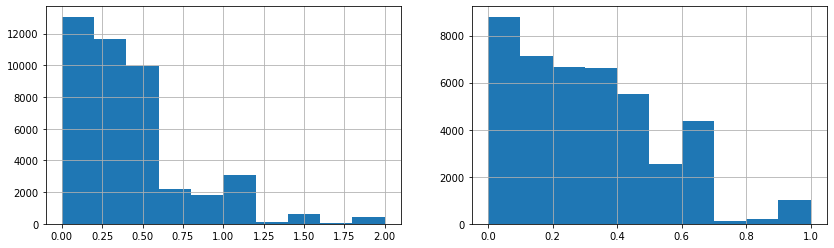

In [159]:
_, (ax0, ax1) = plt.subplots(1, 2, figsize=(14, 4))
df_products['netto'].clip(None, 2).hist(ax=ax0)
np.log1p(df_products['netto']).clip(None, 1).hist(ax=ax1)

plt.show()

## Purchases

In [140]:
df_purchases

,client_id,transaction_id,transaction_datetime,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,store_id,product_id,product_quantity,trn_sum_from_iss,trn_sum_from_red,transaction_month
0,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,9a80204f78,2.0,80.0,NaN,2018-12-01
1,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,da89ebd374,1.0,65.0,NaN,2018-12-01
2,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,0a95e1151d,1.0,24.0,NaN,2018-12-01
3,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,4055b15e4a,2.0,50.0,NaN,2018-12-01
4,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,a685f1916b,1.0,22.0,NaN,2018-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45786563,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,24d5a54f42,1.0,164.0,NaN,2019-03-01
45786564,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,7427d0830d,1.0,134.0,NaN,2019-03-01
45786565,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,6c547c2ca8,1.0,60.0,NaN,2019-03-01
45786566,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,d04e7a8338,1.0,48.0,NaN,2019-03-01


In [33]:
df_purchases.count()

client_id                  45786568
transaction_id             45786568
transaction_datetime       45786568
regular_points_received    45786568
express_points_received    45786568
regular_points_spent       45786568
express_points_spent       45786568
purchase_sum               45786568
store_id                   45786568
product_id                 45786568
product_quantity           45786568
trn_sum_from_iss           45786568
trn_sum_from_red            3043356
dtype: int64

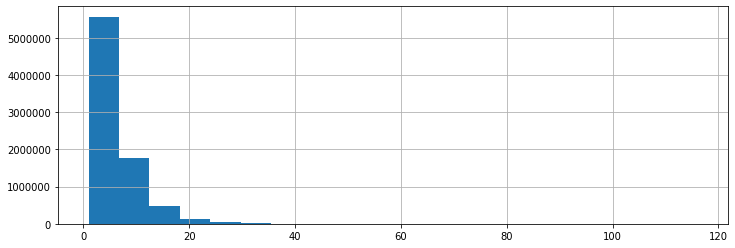

In [67]:
df_purchases.groupby(['transaction_id', 'client_id'])['transaction_datetime'].count().hist(bins=20, figsize=(12, 4))

In [52]:
df_purchases['client_id'].nunique()

400162

In [68]:
df_purchases.groupby(['transaction_id', 'client_id'])['transaction_datetime'].count().quantile([0.15, 0.95])

0.15     2.0
0.95    15.0
Name: transaction_datetime, dtype: float64

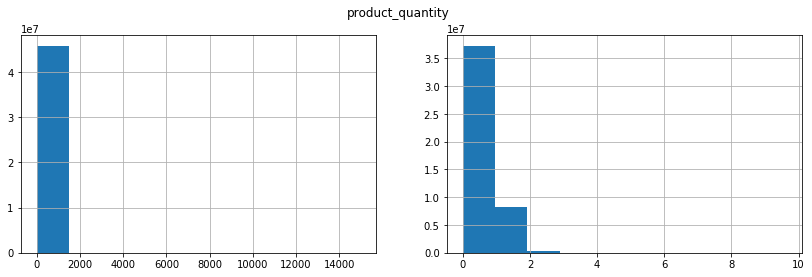

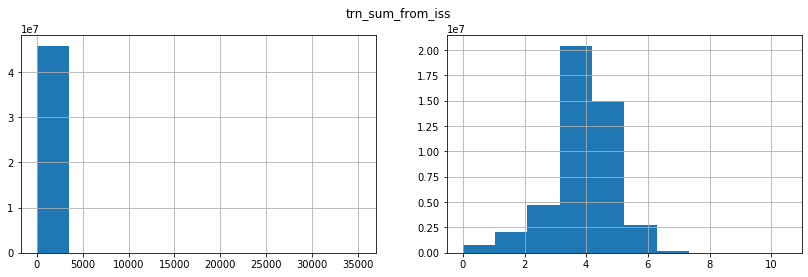

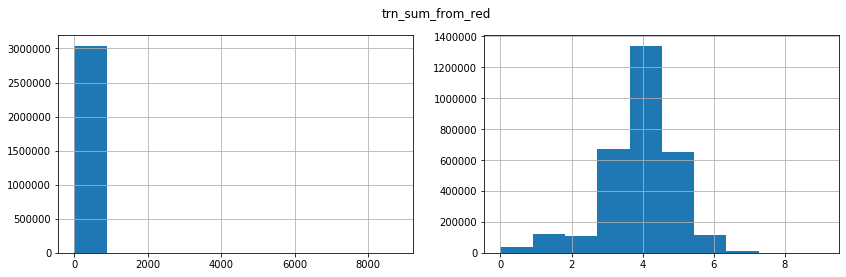

In [164]:
for col in [
#     'regular_points_received', 'express_points_received',
#     'regular_points_spent', 'express_points_spent',
#     'purchase_sum',
    'product_quantity', 'trn_sum_from_iss', 'trn_sum_from_red',
]:
    _, (ax0, ax1) = plt.subplots(1, 2, figsize=(14, 4))
    df_purchases[col].hist(ax=ax0)
    (np.log1p(abs(df_purchases[col])) * np.sign(df_purchases[col])).hist(ax=ax1)
    plt.suptitle(col)
    plt.show()

## Transactions

In [97]:
df_trx = df_purchases \
    .drop(columns=['product_id', 'product_quantity', 'trn_sum_from_iss', 'trn_sum_from_red']) \
    .drop_duplicates()

In [201]:
df_trx

,client_id,transaction_id,transaction_datetime,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,store_id,transaction_month
0,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,2018-12-01
19,000012768d,c1ca85d462,2018-12-16 08:56:01,5.7,0.0,0.0,0.0,574.0,ed8d2683fd,2018-12-01
30,000012768d,6a0e96d0bc,2019-03-08 10:12:03,8.0,0.0,0.0,0.0,803.0,017c89b915,2019-03-01
46,000012768d,b34f23306e,2019-03-14 15:01:47,2.0,0.0,0.0,0.0,419.0,017c89b915,2019-03-01
52,000036f903,12b218b054,2018-11-28 10:48:36,1.2,0.0,0.0,0.0,241.0,6381a55c22,2018-11-01
...,...,...,...,...,...,...,...,...,...,...
45786546,fffff6ce77,eba2694c0c,2019-02-28 12:56:31,1.8,0.0,0.0,0.0,446.0,5ec64bdccb,2019-02-01
45786555,fffff6ce77,bdd578a115,2019-03-05 15:07:03,0.3,0.0,0.0,0.0,247.0,5ec64bdccb,2019-03-01
45786556,fffff6ce77,6d9fc7ad6b,2019-03-06 16:26:35,0.1,0.0,0.0,0.0,109.0,5ec64bdccb,2019-03-01
45786558,fffff6ce77,b8b6e5e851,2019-03-06 16:53:10,0.2,0.0,0.0,0.0,245.0,6e4faad02e,2019-03-01


In [98]:
(df_trx['transaction_id'] + '-' + df_trx['client_id']).value_counts()

095561a391-19d2967ec2    1
a97cf352bd-2f40d4a068    1
f70d6ad369-1d1a480d5e    1
a1e5bd111e-0ae9c3fccd    1
328a01845c-bf288ed310    1
                        ..
acd0cc7a81-493be7d242    1
f7dbf457e8-0c1e2edf4c    1
d385e79375-3a83c34d7f    1
127958183b-2f4113fe87    1
567a182495-dcf878fc9c    1
Length: 8045229, dtype: int64

In [54]:
df_trx.count()

client_id                  8045229
transaction_id             8045229
transaction_datetime       8045229
regular_points_received    8045229
express_points_received    8045229
regular_points_spent       8045229
express_points_spent       8045229
purchase_sum               8045229
store_id                   8045229
dtype: int64

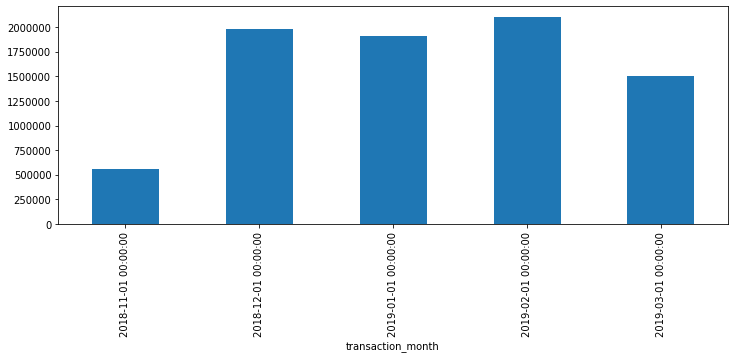

In [100]:
df_trx.groupby('transaction_month')['transaction_id'].count().plot(figsize=(12, 4), kind='bar')

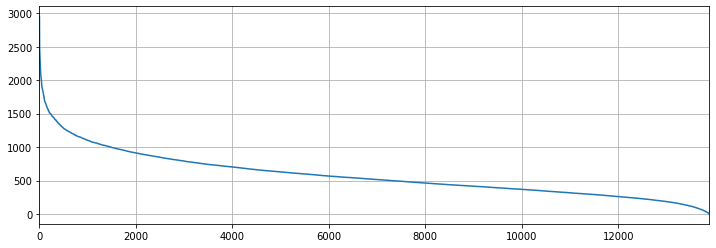

In [147]:
df_trx['store_id'].value_counts().reset_index(drop=True).plot(figsize=(12, 4), grid=True)

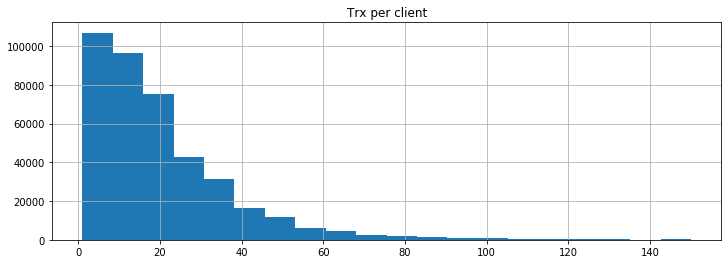

In [51]:
df_trx.groupby('client_id')['transaction_id'].count().clip(None, 150).hist(bins=20, figsize=(12, 4))
plt.title('Trx per client')
plt.show()

In [65]:
df_trx.groupby('client_id')['transaction_id'].count().quantile([0.15, 0.95])

0.15     5.0
0.95    54.0
Name: transaction_id, dtype: float64

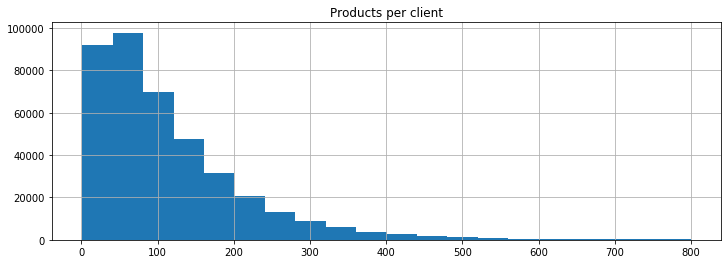

In [203]:
df_purchases.groupby('client_id')['transaction_id'].count().clip(None, 800).hist(bins=20, figsize=(12, 4))
plt.title('Products per client')
plt.show()

In [66]:
df_purchases.groupby('client_id')['transaction_id'].count().quantile([0.15, 0.95])

0.15     29.0
0.95    312.0
Name: transaction_id, dtype: float64

In [112]:
df_trx.sort_values(['client_id', 'transaction_datetime']).set_index('client_id') \
    .groupby(level='client_id')['transaction_datetime'].diff()

client_id
000012768d                NaT
000012768d   15 days 01:43:16
000012768d   82 days 01:16:02
000012768d    6 days 04:49:44
000036f903                NaT
                   ...       
fffff6ce77    1 days 11:54:23
fffff6ce77    5 days 02:10:32
fffff6ce77    1 days 01:19:32
fffff6ce77    0 days 00:26:35
fffff6ce77    9 days 00:53:52
Name: transaction_datetime, Length: 8045229, dtype: timedelta64[ns]

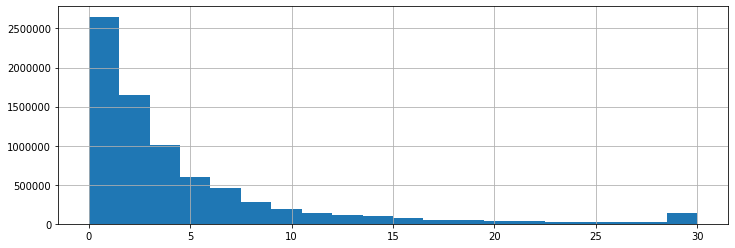

In [123]:
df_trx.sort_values(['client_id', 'transaction_datetime']).set_index('client_id') \
    .groupby(level='client_id')['transaction_datetime'].diff().dropna() \
    .astype(int).div(1e9 * 24 * 60 * 60).clip(None, 30).hist(bins=20, figsize=(12, 4))

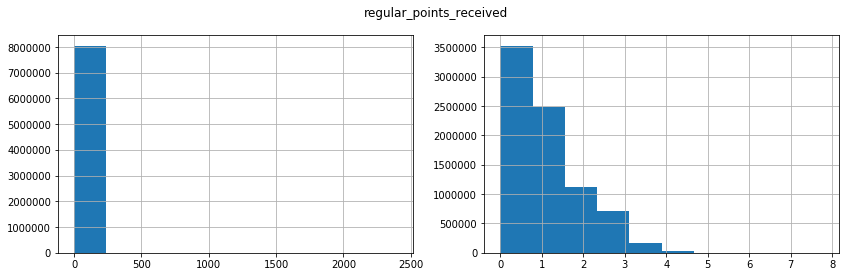

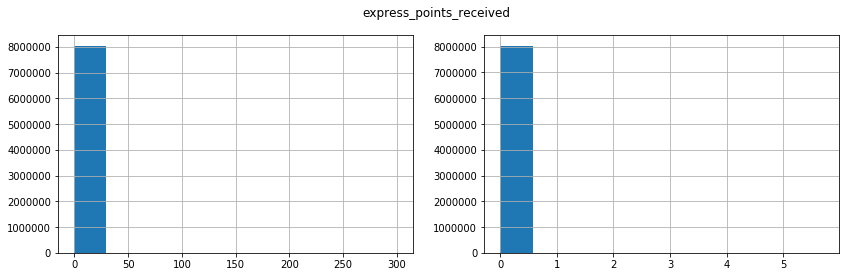

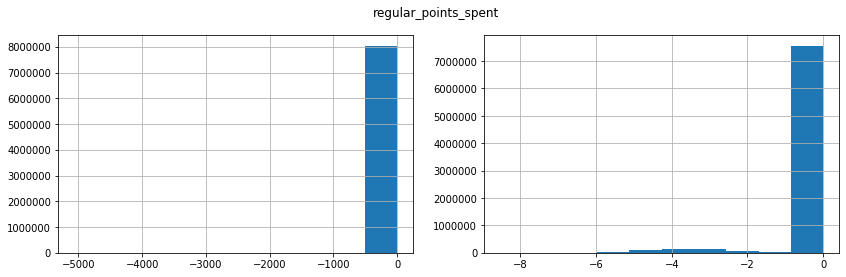

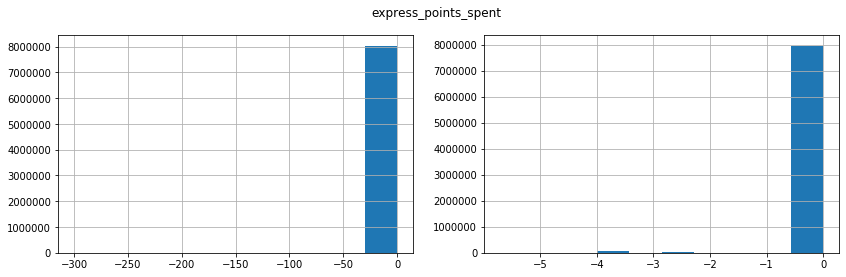

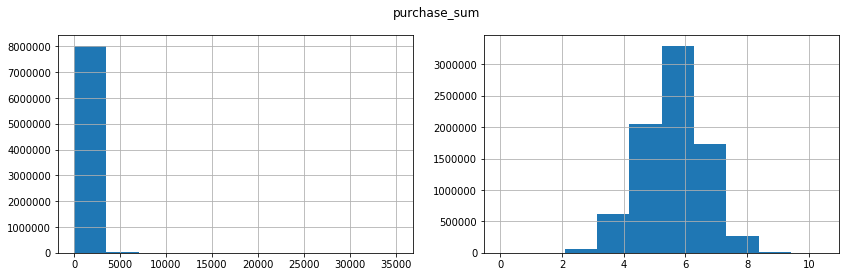

In [163]:
for col in [
    'regular_points_received', 'express_points_received',
    'regular_points_spent', 'express_points_spent',
    'purchase_sum',
    # 'product_quantity', 'trn_sum_from_iss', 'trn_sum_from_red',
]:
    _, (ax0, ax1) = plt.subplots(1, 2, figsize=(14, 4))
    df_trx[col].hist(ax=ax0)
    (np.log1p(abs(df_trx[col])) * np.sign(df_trx[col])).hist(ax=ax1)
    plt.suptitle(col)
    plt.show()

# Time periods

In [124]:
# choose top N products and check it over time

In [138]:
top_n_products = df_purchases.groupby('product_id')['transaction_id'].count().sort_values().iloc[-15:].index.tolist()
top_n_products

['113e3ace79',
 '5645789fdf',
 '31dcf71bbd',
 'dc2001d036',
 '0a46068efc',
 '343e841aaa',
 '439498bce2',
 '4a29330c8d',
 '5cb93c9bc5',
 'f4599ca21a',
 '4dcf79043e',
 '3e038662c0',
 'bf07df54e1',
 '15ccaa8685',
 '4009f09b04']

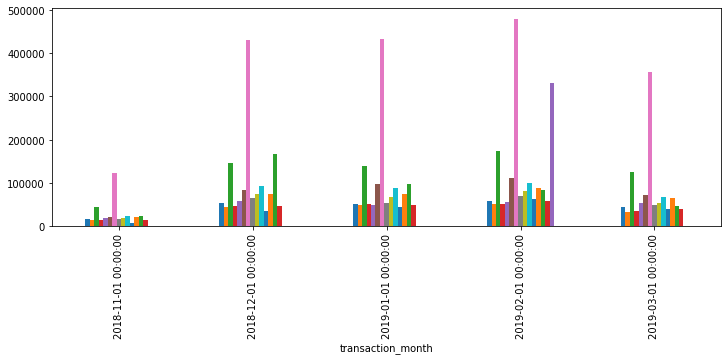

In [139]:
df_purchases[lambda x: x['product_id'].isin(top_n_products)] \
    .groupby(['transaction_month', 'product_id'])['transaction_id'].count().unstack() \
    .plot(figsize=(12, 4), kind='bar', legend=False)

In [194]:
!du -sh ../data/*.parquet

84M	../data/test_trx.parquet
722M	../data/train_trx.parquet
